<a href="https://colab.research.google.com/github/kplr-training/Data-Visualisation/blob/main/Seaborn/raw/iris-data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
Le but de ce projet est d'explorer les techniques de visualisation de données en utilisant le jeu de données Iris. 

![51518iris img1](https://user-images.githubusercontent.com/124377497/228523260-95a4eb05-13a9-46bf-9dbe-8fbcf3f1141f.png)


## Setup
Les paquets suivants devront être installés : pygal, pandas, seaborn, matplotlib.

In [1]:
# Commencez par importer pandas et seaborn, respectivement une bibliothèque d'analyse de données et une bibliothèque graphique.

import pandas as pd

# Pour ignorer les avertissements, utilisez le code suivant pour rendre l'affichage plus attrayant.
# Importer seaborn et matplotlib.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# pour importer Iris dataset:
iris = pd.read_csv("../input/Iris.csv") # le jeu de données sur l'iris est maintenant un DataFrame Pandas

# Pour visualiser les données Iris ci-dessous:
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Échantillons de chaque espèce
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

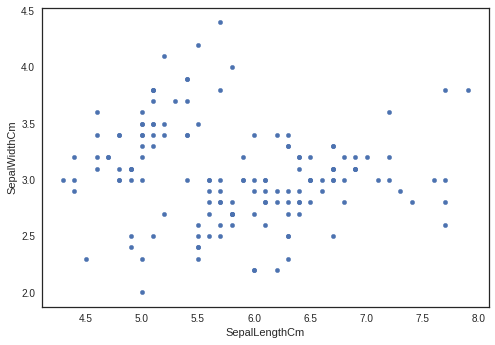

In [3]:
# L'extension pandas plot peut être utilisée pour faire un nuage de points
# Affichez votre graphique avec plt.show

iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

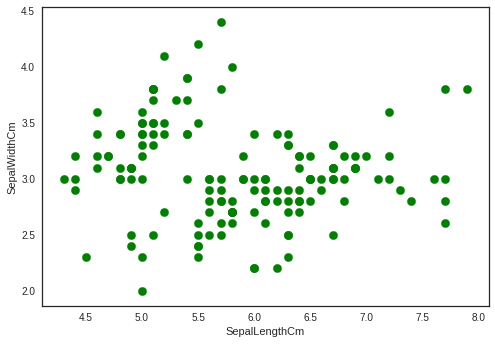

In [4]:
#Pour modifier la couleur et la taille, ajoutez ce qui suit :
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="green",s=70 )
plt.show()

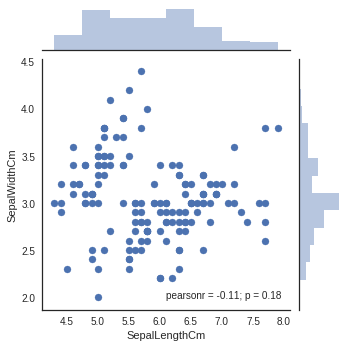

In [5]:
# Utiliser seaborn jointplot, pour faire des diagrammes de dispersion bivariés et des histogrammes univariés dans un seul graphique.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
plt.show()

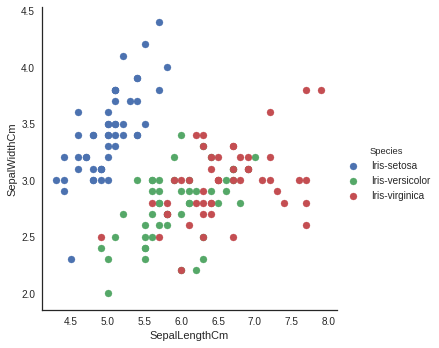

In [6]:
# Modifier le graphique ci-dessus en attribuant à chaque espèce une couleur individuelle.
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

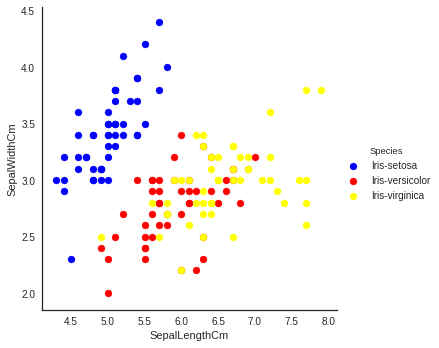

In [7]:
# Changez les couleurs des points de données dans le graphique ci-dessus
# Attribuez un nom de variable aux couleurs et insérez hue_kws="nom de variable" comme indiqué.
KS = {'color': ['blue', 'red', 'yellow']}
sns.FacetGrid(iris, hue_kws=KS, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

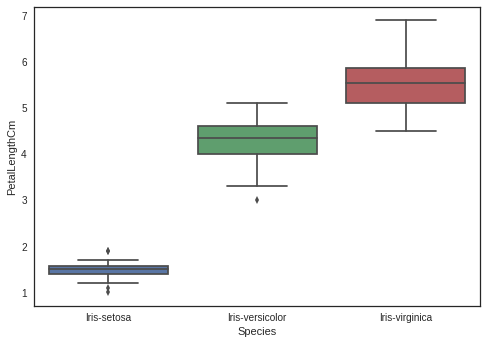

In [8]:
# Tracer les données sur les espèces à l'aide d'une boîte à moustache :
sns.boxplot(x="Species", y="PetalLengthCm", data=iris )
plt.show()

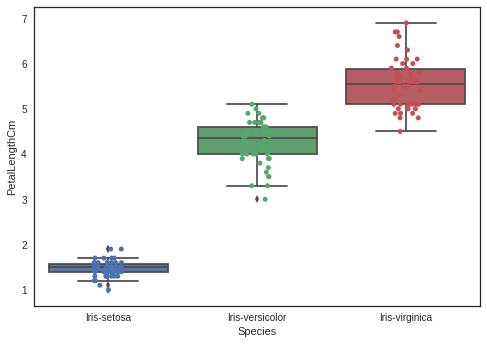

In [9]:
# Utiliser le striplot de Seaborn pour ajouter des points de données au dessus du box plot 
# Insérer jitter=True pour que les points de données restent dispersés et ne soient pas empilés en une ligne verticale.
# Attribuer un axe à chaque axe, de manière à ce que chaque tracé se trouve au-dessus de l'axe précédent.

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")
plt.show()

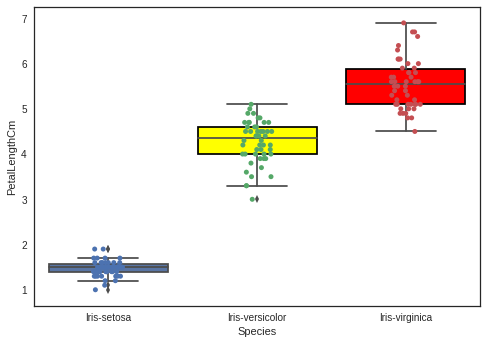

In [10]:
# Modifier le tracé ci-dessus pour changer la couleur de remplissage et de bordure en utilisant ax.artists.
# Attribuer un nom de variable à ax.artists, et insérer le numéro de la boîte dans les parenthèses correspondantes

ax= sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax= sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

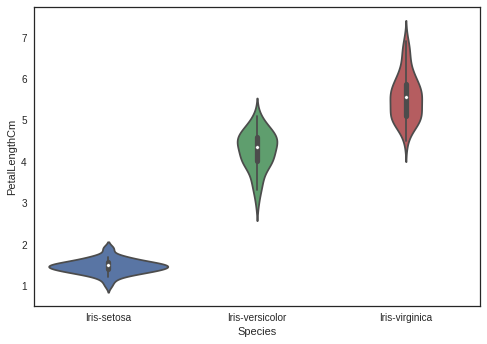

In [11]:
# Un diagramme de violon montre la densité des données, de manière similaire à un diagramme de dispersion,
# et présente des données catagoriques comme un diagramme en boîte.
# Les régions les plus denses des données sont plus grasses.
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)
plt.show()

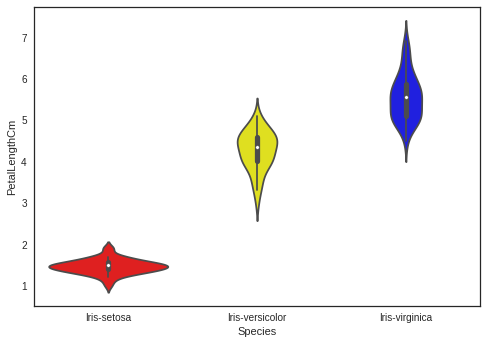

In [12]:
# Pour changer la couleur de remplissage du violon, choisissez les couleurs souhaitées et mettez-les à égalité avec la palette.

sns.violinplot(x="Species", y="PetalLengthCm",  palette={"blue","red","yellow"}, data=iris, size=6)
plt.show()

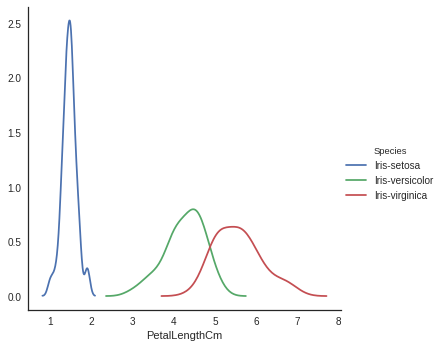

In [13]:
# kdeplot de seaborn, trace des estimations de densité univariées ou bivariées.
#La taille peut être modifiée en jouant sur la valeur utilisée.
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()
plt.show()

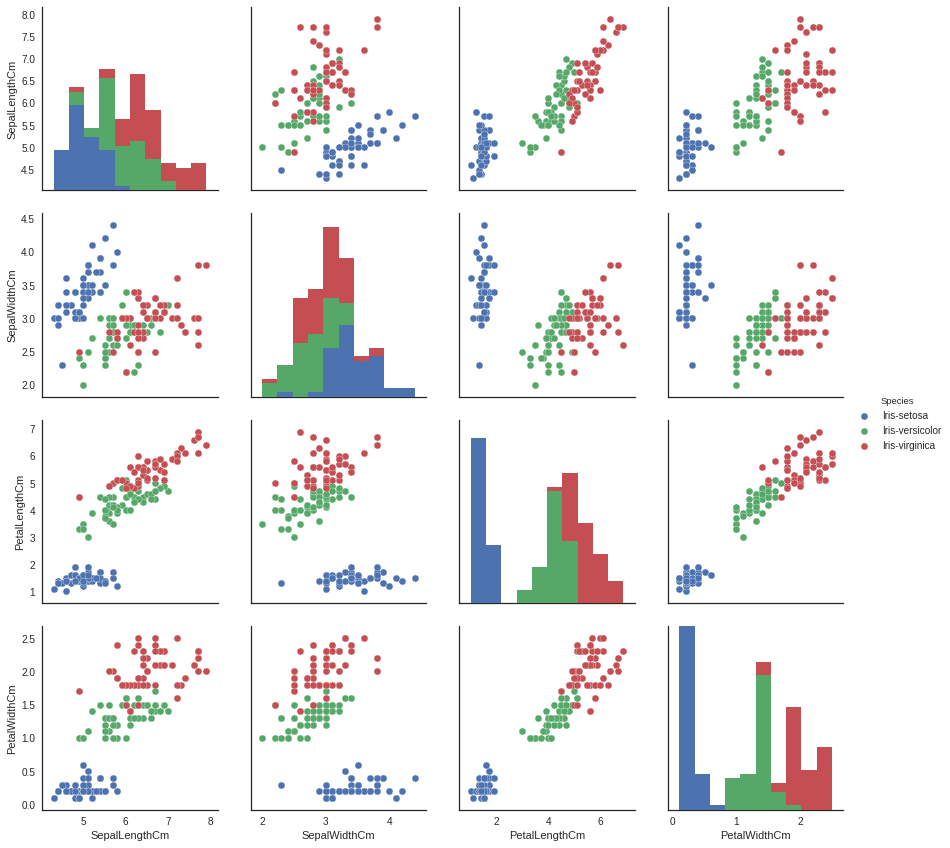

In [14]:
# Utilisez le diagramme des paires pour analyser la relation entre les espèces pour toutes les combinaisons de caractéristiques. 
# Une tendance observable montre une relation étroite entre deux des espèces.
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)
plt.show()


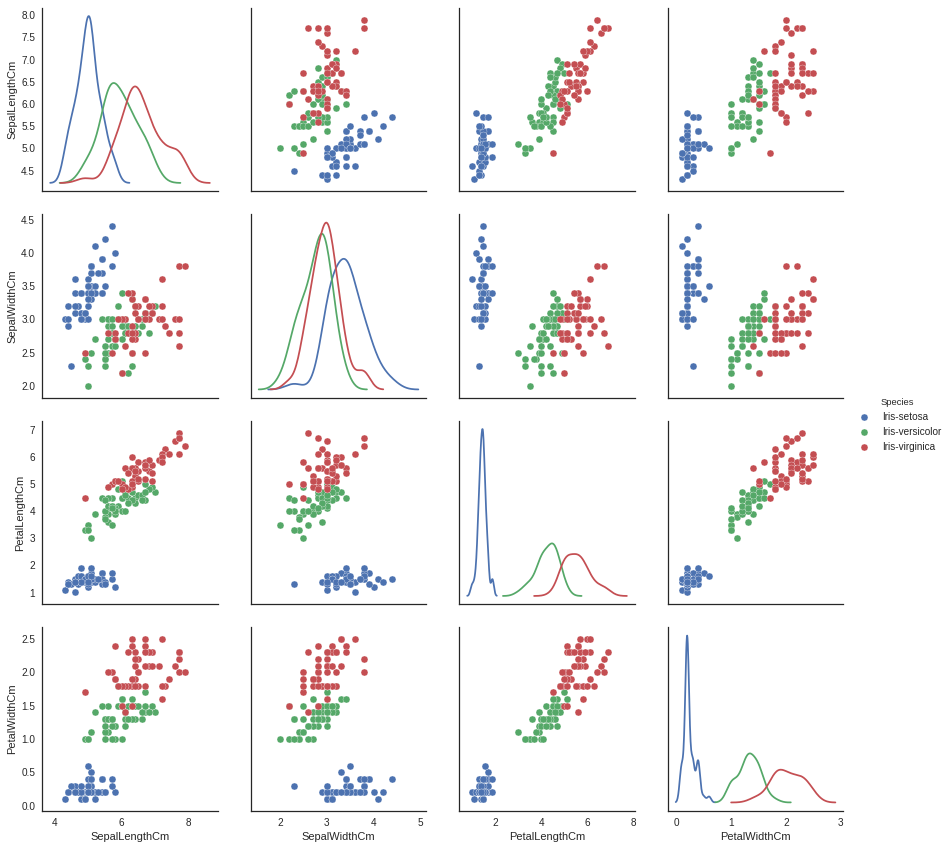

In [15]:
# Mettre diag_kind égal à kde pour modifier les éléments de diagnostic en montrant l'estimation de la densité kernale.

sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")
plt.show()

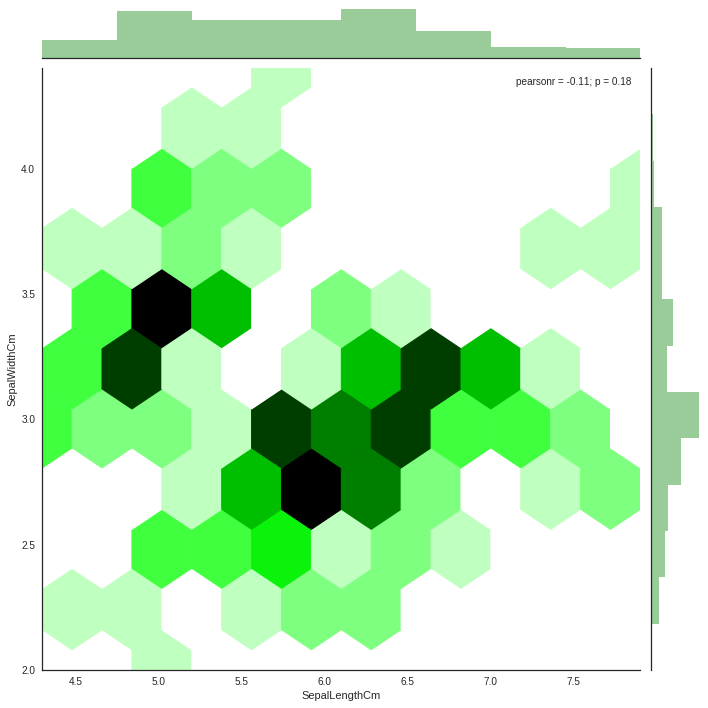

In [16]:
# Utiliser le jointplot de seaborn pour faire un bin plot hexagonal
# Définir la taille et le ratio désirés et choisir une couleur.
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=10,ratio=10, kind='hex',color='green')
plt.show()

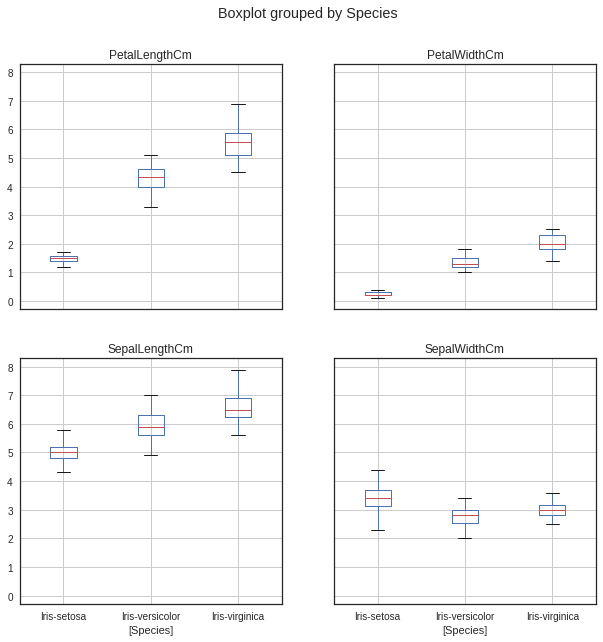

In [17]:
# Pour faire un boxplot Pandas groupé par espèce, utiliser .boxplot
# Modifier le figsize, en plaçant une valeur dans les coordonnées X et Y
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(10, 10))
plt.show()


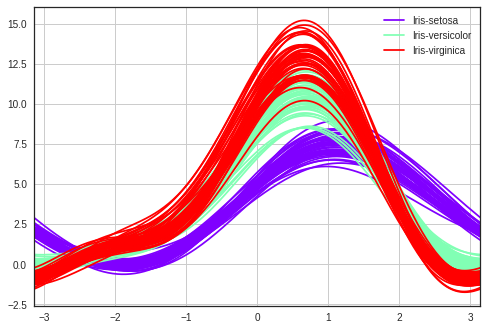

In [18]:
#Dans Pandas, utilisez les courbes d'Andrews pour tracer et visualiser la structure des données.
#Chaque observation multivariée est transformée en courbe et représente les coefficients d'une série de Fourier.
#Ceci est utile pour détecter les valeurs aberrantes dans les données de séries temporelles.
#Utilisez la carte des couleurs pour changer la couleur des courbes.

from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species",colormap='rainbow')
plt.show()

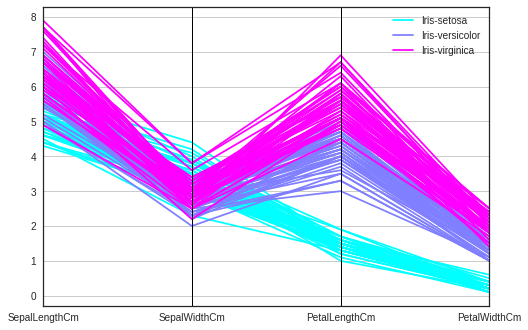

In [19]:
#Parallel_cordinates trace chaque caractéristique sur une colonne séparée.
#Chaque caractéristique est ensuite reliée par des lignes, pour chaque échantillon de données.
#Encore une fois, la carte des couleurs peut être utilisée pour choisir un assortiment de couleurs.
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species",colormap='cool')
plt.show()

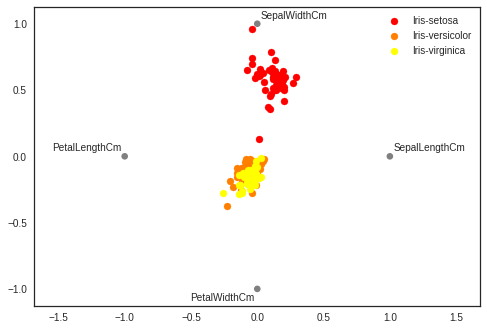

In [20]:
# Utiliser la fonction radviz de Pandas pour tracer les caractéristiques sur un plan 2D.
#Chaque échantillon est attaché à chaque point à l'aide d'ancres dimensionnelles,
#pondéré par la valeur relative de cette caractéristique. 
#J'ai également modifié les couleurs dans cette représentation
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species",colormap='autumn')
plt.show()